# 2. 2D Animated Plots
In this part I will consider different types of animated region plots, i.e. I plot certain regions in the plane with some color (red) and the rest in a different color (white). 
## 2.1 Plotting Elemantary 2D Geometric Shapes

The submodule [Patches](https://matplotlib.org/stable/api/patches_api.html) of Matplotlib offers a great opportunity to plot certain geometric shapes like circles, annuli, ellipses, rectangles, polygons, etc. There are many great advantages of this method. First of all, it is faster than creating these shapes via meshgrid and, more importantly, it creates a scale-free object. Meaning that it will return a vecotrized plot (curves will be smooth even when zooming in, later more on this) provided that the figure is saved in format that supports vectorized images, e.g. PGF. To do this, we only need Numpy and Matplotlib with its submodules Pyplot and Patches. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.ioff()

For demonstrastion, I'll animate an annulus with varing radii. The code for the animation works similarly as in the 1D case. 

C:\Users\User\AppData\Local\Temp\ipykernel_11920\1095451814.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\1095451814.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])


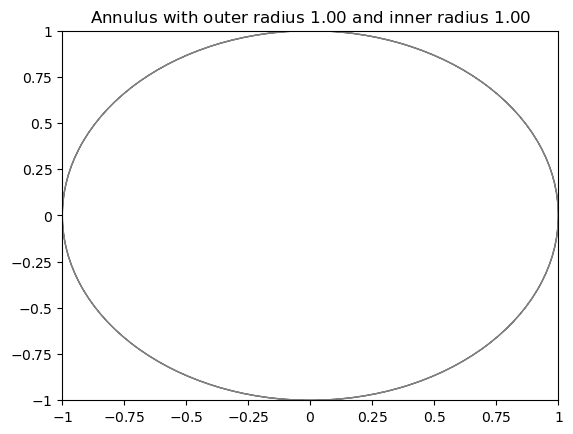

In [2]:
frames=100
#specify parameters of annulus
midpoint = (0,0)
x=np.linspace(0, np.pi/2, frames)
radius=np.cos(x)
width=np.sin(x)

fig, ax =plt.subplots()

def animation(i): 
    ax.clear()
    if width[i]<radius[i]: 
        annulus=mpl.patches.Annulus(midpoint, r=radius[i], width=width[i], facecolor='r', edgecolor='gray', linewidth=1)
        ax.set_title(rf'Annulus with outer radius ${radius[i]:.2f}$ and inner radius ${radius[i]-width[i]:.2f}$')
    else: 
        annulus=mpl.patches.Circle(midpoint, radius=radius[i], facecolor='r', edgecolor='gray', linewidth=1)
        ax.set_title(rf'Annulus with outer radius ${radius[i]:.2f}$ and inner radius ${0.00}$. ')
    ax.add_artist(annulus)      #add annulus to plot
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_xticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])
    ax.set_yticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$']) 

from matplotlib.animation import FuncAnimation

anim=FuncAnimation(fig, animation, frames=frames, interval=100, repeat=True)

anim.save(r'figures/annulus.gif')

This'll looks like this ![Annulus](annulus.gif)

This brings us to another drawback of directly generate the animation in python, the title of the figure kind of wabbels around as the parameters vary. This looks very irksome. Letting LaTex rendering the title automatically resolves this problem. The code is again very similar to 1D case. 

In [3]:
mpl.use('pgf')

pgf_latex = {                      #setup parameters of Matplotlib to use LaTeX for output
    "pgf.texsystem": "pdflatex",        
    "text.usetex": True,                #LaTeX will write all text
    "font.family": "serif",
    "font.serif": [],                    
    "font.sans-serif": [],              
    "font.monospace": [],
    "axes.labelsize": 10,               
    "font.size": 10,
    "legend.fontsize": 8,               
    "xtick.labelsize": 8,               
    "ytick.labelsize": 8,
    "pgf.preamble": "\n".join([         #plots will use this preamble
        r"\usepackage{amsmath}",
        ])
    }
mpl.rcParams.update(pgf_latex)

In [4]:
fig, ax =plt.subplots()
for i in range(frames): 
    ax.clear()
    if width[i]<radius[i]: 
        annulus=mpl.patches.Annulus(midpoint, r=radius[i], width=width[i], facecolor='r', edgecolor='gray', linewidth=1)
        ax.set_title(rf'\text{{Annulus with outer radius}}\ ${radius[i]:.2f}$\text{{ and inner radius}}\ ${radius[i]-width[i]:.2f}$')
    else: 
        annulus=mpl.patches.Circle(midpoint, radius=radius[i], facecolor='r', edgecolor='gray', linewidth=1)
        ax.set_title(rf'\text{{Annulus with outer radius}}\ ${radius[i]:.2f}$\text{{ and inner radius}}\ ${0.00}$. ')
    ax.add_artist(annulus)      #add annulus to plot
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_xticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])
    ax.set_yticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])
    fig.savefig(rf'figures/annulus/im-{i}.pgf', format='pgf')

C:\Users\User\AppData\Local\Temp\ipykernel_11920\726367923.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\726367923.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$-1$', '$-0.75$', '$-0.5$', '$-0.25$',  '$0$', '$0.25$', '$0.5$', '$0.75$', '$1$'])


If done correctrly, the PDF file looks like this [Annulus](annulus.pdf)

## 2.1. Plotting 2D-Regions with Inequality Constraints

More complicated regions are most often given in terms of inequalities. Let us first discuss how to plot non-animated regions. To this end, we need the numpy function [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) and the Matplotlib function [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for plotting. For demonstration I want to plot the set of those points of the $xy$-plane which lie 'inside' the graph of $f(x)=x^2$, i.e. I want to plot the set 
$$S:=\left\{z=\begin{pmatrix} y\\ x \end{pmatrix} \in \mathbb{R}^2 \mid y\geq f(x)=x^2\right\}. $$

### 2.1.1 Mehsgrid

In order, to do that, we first have to decide in which range of the $xy$-plane we want to display our plot. We choose here $[-2, 2] \times [-1, 2]$ as the window in which to display our set. Thus we initialise two numpy arrays; one stands for the $x$-coordinates and hence goes from $-2$ to $2$ and one which stands for the $y$-coordinates and hence $-1$ to $2$. We choose that our vectors should contain $1001$ point each.  

In [5]:
x=np.linspace(-2, 2, 1001)
y=np.linspace(-1, 2, 1001)

Now we create a numpy meshgrid. The meshgrid function return two matrices, both of dimension *len(x) $\times$ len(y)*. 

In [6]:
X, Y = np.meshgrid(x,y)
print('X is Matrix of dimension '+str(X.shape))
print('Y is Matrix of dimension '+str(Y.shape))

X is Matrix of dimension (1001, 1001)
Y is Matrix of dimension (1001, 1001)


Each row of the matrix $X$ is simply the vector $x$ and each column of the matrix $Y$ is simply the vector $y$. Now comes the interesting part. We create a boolean mask of the set $S$, that is a third matrix *F* of the same dimension as *X* and *Y*, which is defined for each pair of indices *i,j* as **True/$1$** if the point with $x$-coordiante *X[i,j]* and $y$-coordinate *Y[i,j]* should be colorized or **False/$0$** otherwise. An intuitive way to implement this for our set $S$ is to first initialise *F* as a $0$ matrix of the same dimension as *X* and *Y* and than change those entries to $1$ for which our inequality is satisfied: 

In [7]:
F=np.zeros_like(Y)      #could also write X instead of Y
for i in range(len(Y)):     #could also write X instead of Y
    for j in range(len(Y)):     #could also write X instead of Y 
        if Y[i,j]>=X[i,j]**2: 
            F[i,j]=1
        else: 
            pass        #Does nothing, but must be there otherwise Error Message occurs

However, loops in python are rather slow. Thus we recommend to use a shorthand code which is much faster (in particular if there are more complex calculations to be done), but does the same thing. 

In [8]:
F=(Y>=X**2)
print('F is Matrix of dimension '+str(F.shape))

F is Matrix of dimension (1001, 1001)


### 2.1.2. Colormpas and Pcolormesh

Before we can use pcolormesh we have to specify in which color each point should be colorized. This is slightly more complicated tha in the 1D case. However, it allows a greater degeree of freedom, which will be, in particular, useful later. The concrete way to do it is to define a [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html). There are many pre-designed colormaps which we shall encounter in greater detail in the next section. But for now, we create our own customized colormap. 

In [9]:
rw=mpl.colors.ListedColormap(['white', 'red'])      #Create a new colormap with just two colors: white and red

A colormap maps each value of the input function to a color in the colormap in ascending order. Thus, in our case, $0$ will be mapped to white and $1$ to red. Now, we are ready to plot. The code do this is very short. 

In [10]:
mpl.rcParams.update(mpl.rcParamsDefault)     #reset rcParams for the moment
mpl.use('qtagg')

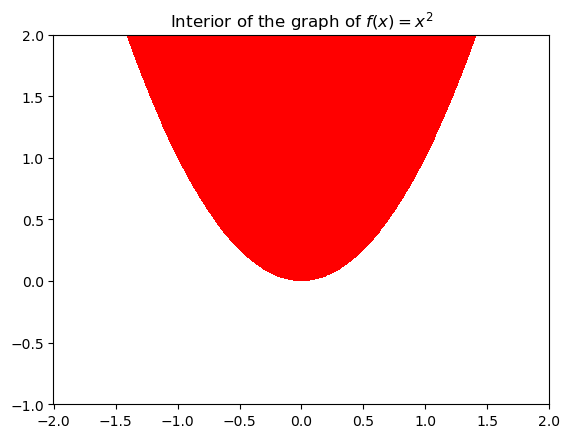

In [11]:
fig, ax =plt.subplots()
ax.pcolormesh(X, Y, F, cmap=rw)  
ax.set_title(r'Interior of the graph of $f(x)=x^2$')
fig

**Hint:** As you can see, one can detect edges in the plot. However, this can easily be resolvend by choosing more points for the meshgrid and a higher dpi value for saving the figure. Be aware that, by default, the figure displayed in Jupyter is of *dpi=300* independently of the dpi used for saving it. So make sure you open the saved figure seperately to inspect resolution. 

## 2.2. Several Inequality Constraints

The great advantage of boolean mask is that is very easy and straigthforward to combine several inequalities. Suppose we want the intersection of the set $S$ from above with the following half-plane
$$H_+:= \left\{z=\begin{pmatrix} y\\ x \end{pmatrix} \in \mathbb{R}^2 \mid y\leq 1.5\right\}. $$
Then we just need to create another boolean mask $G$ according to the set $H_+$: 

In [12]:
F1=(Y<=1.5)

Then multply *F2* with *F* elementwise (elementwise multiplication of boolean masks correspnds to intersection of the respective sets): 

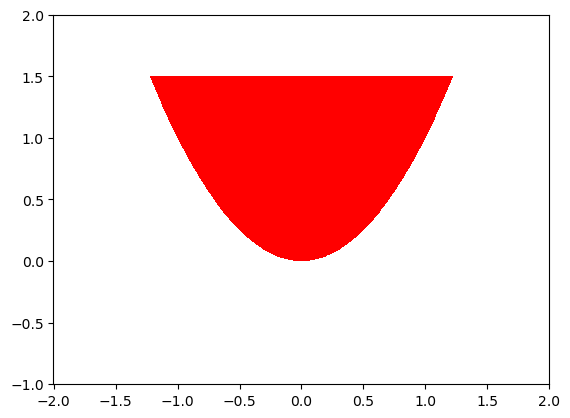

In [13]:
fig, ax =plt.subplots()
ax.pcolormesh(X, Y, F*F1, cmap=rw)
fig

If, on the other hand, we want add region 
$$H_-:=\left\{z=\begin{pmatrix} y\\ x \end{pmatrix} \in \mathbb{R}^2 \mid y\leq 0\right\},  $$ 
in other words, unite $S \cap H_+$ with the set $H_-$. We create a third boolean mask *F3* and simlly add it to *F* (elemntwise addition corresponds to union of disjoint sets)

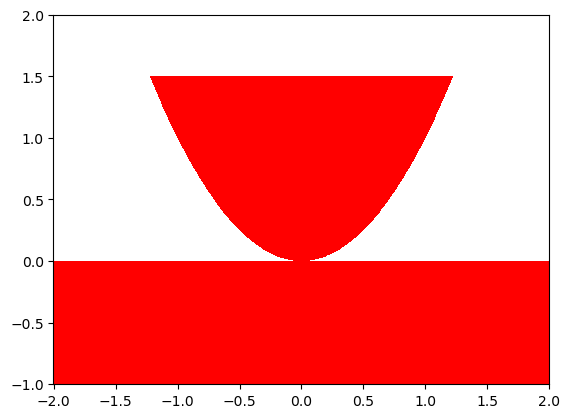

In [14]:
F2=(Y<=0)

fig, ax =plt.subplots()
ax.pcolormesh(X, Y, F*F1+F2, cmap=rw)
fig

If we would like that $S\cap H_+$ and $H_-$ have different colors, we could easily do that by changing the colormap and the values of $F$. 

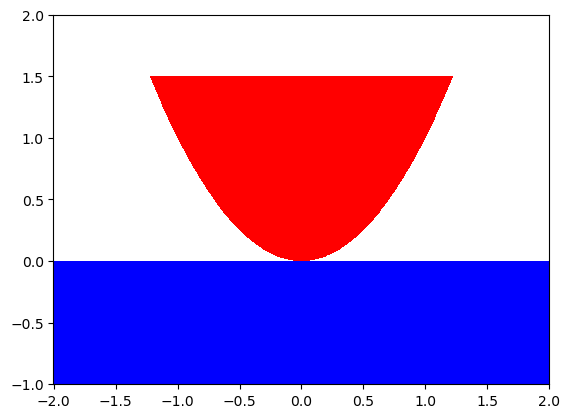

In [15]:
rbw=mpl.colors.ListedColormap(['white', 'blue', 'red']) 

fig, ax =plt.subplots()
ax.pcolormesh(X, Y, 2*F*F1+F2, cmap=rbw)        #the entries of G will now have the values 0, 1 and 2 corresponding to certain regions
fig

## 2.3. Adding Plots of Boundaries 

Highlighting the boundaries of regions is often of interest, but can become some sort of a mess. Suppose we want to highlight the boundaray of $S \cap H_+$ in darkred. 

In [16]:
fig, ax =plt.subplots()     #initialize plot
ax.pcolormesh(X, Y, F*F1, cmap=rw)

Next, we want to plot the graph of $f(x)=x^2$ and a horizontal line at $1.5$ but only for x in the interval $[-\sqrt{1.5}, \sqrt{1.5}]$. For this reason lets find all entries of the vector *x* which are between $-\sqrt{1.5}$ and $\sqrt{1.5}$ and cut of the rest. 

In [17]:
x1=x[abs(x)<=np.sqrt(1.5)]       #create new vector constisting of only those entries within [-sqrt(1.5), sqrt(1.5)]

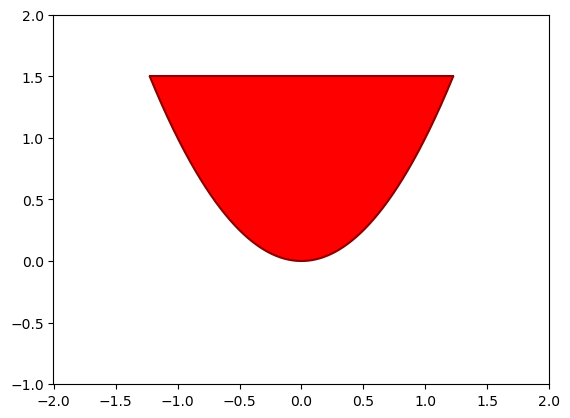

In [18]:
ax.plot(x1, 1.5*np.ones_like(x1), color='darkred')      #plot horizantel line at 1.5 in [-sqrt(1.5), sqrt(1.5)]
ax.plot(x1, x1**2, color='darkred')     #plot graph of x^2 in [-sqrt(1.5), sqrt(1.5)]
fig

## 2.4. Implicite Inequality Constraints

Fortunately, the method above works just as-well for a region given by implicite inequality constraint. For demonstration, consider a parameter $\gamma>0$ and the set 
$$S_\gamma:=\left\{z=\begin{pmatrix} y\\ x \end{pmatrix} \in \mathbb{R}^2 \mid x>0,\ P_{\gamma, y}(x)\geq 0\right\},  $$ 
where $P_{\gamma, y}(x)$ is the polynomial given for any $y \in \mathbb{R}$ as  
$$P_{\gamma, y}(x):=x^3-\gamma |y|^3 x^2 +(y^2-\gamma)x - \gamma |y|^5, \quad x \in (0, \infty). $$
Let us first plot $S_\gamma$ for $\gamma=0.2$. 

C:\Users\User\AppData\Local\Temp\ipykernel_11920\4135225337.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '$0$', '$2$', '$4$', '$6$', '$8$', '$10$', ''])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\4135225337.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])


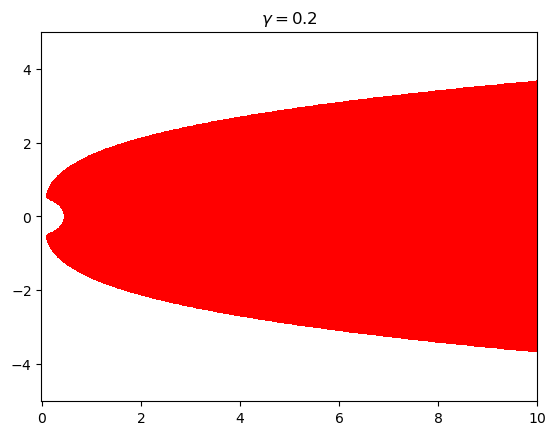

In [19]:
gamma =.2
x=np.linspace(0, 10, 1000)
y=np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
F=(X**3-gamma*abs(Y)**3*X**2+(Y**2-gamma)*X-gamma*abs(Y)**5>=0)
fig, ax, =plt.subplots()
ax.pcolormesh(X, Y, F, cmap=rw)
ax.set_title(r'$\gamma=0.2$')
ax.set_xticklabels(['', '$0$', '$2$', '$4$', '$6$', '$8$', '$10$', ''])
ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])
fig

Highlighting the boundary here gets a bit trickier. Note that the boundary of $S_\gamma$ is given by the equation 
$$P_{\gamma, y}(x)=0, \quad x>0. $$
Though third degree polynomials like $P$ posses anlytic solutions, they're given by a rather complicated formula and are often not very useful in practice. Thus the best way of highlighting the boundary is to solve the equation $P_{\gamma, y}(x)=0$ numerically and the plot this 1D approximation. The best way to that is to use the [SciPy](https://scipy.org/) module. The submodule [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) offers many in-build function for optimization and root finding. I made the best eperience with the [brentq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html). It is a very fast alogrithm and all arguments you need are a continuous function $f$ to find the root of and an interval $[a,b]$ which is such that $f$ has a unique root in $[a, b]$ which is not located at the endpoints $a$ and $b$. In other words, the sign of $f(a)$ and $f(b)$ must be non-zero and different. **Pointer:** $a$ and $b$ must be real numbers, brentq doesn't support intervalls of infinite length. 

So, the only tricky bit to do is to find an intervall such that $P_{\gamma, y}$ has a unique positive root located inside it and is non-zero at the endpoints. Of course, we could just play with the root finding algorithm untill we find suitable points. However, I'm a mathematician and we mathematicians like to prove things.  

*Theorem.* Let $\gamma>0$ and $y \in \mathbb{R}$. Then $P_{\gamma, y}$ has a unique positive root. If $y=0$, then this root equals $\sqrt{\gamma}$. If $y\neq 0$, then this roots is contained in $(\gamma |y|^3, \max\{1, \gamma|y|^5+\gamma|y|^3+|y^2-\gamma|\})$. 

*Proof.* For $y=0$ the claim follows by a simple computation. Thus assume that $y\neq 0$. Since $P_{\gamma, y}(0)=-\gamma |y|^5<0$ and $\lim_{x \to \infty} P_{\gamma, y}(x)=\infty$, there exists at least one positive root by the intermediate value theorem (here we need that $f$ is a continuous function). As $P_{\gamma, y}$ is a third-degree polynomial, it has at most three positive roots (counted with multiplicity). Suppose, for a contradiction, that $P_{\gamma, y}$ has two positive roots $0<r_1\leq r_2$ (counted with multiplicity). If $r_1 \neq r_2$, then $P_{\gamma, y}(0)<0$ shows that $P_{\gamma, y}(x)<0$ for all $x>r_2$; a contradiction to $\lim_{x \to \infty} P_{\gamma, y}(x)=\infty$. If, on the other hand, $r_1=r_2=:r$, then $P_{\gamma, y}$ has a double roots at $r$. Thus $P'_{\gamma, y}(r)=0$. This implies that $r$ is a critical point of $P_{\gamma, y}$. Since $r$ is a double root (and not a triple root) of $P_{\gamma, y}$, we have that $P''_{\gamma, y}(r)\neq 0$. Thus $r$ is either a local minimum or a local maximum of $P_{\gamma, y}$. Since $P_{\gamma, y}(0)<0$, it follows that $P_{\gamma, y}(x)<0$ for all $x \in [0, r)$. Thus $r$ cannot be a local minimum and must therefore be a local maximum of $P_{\gamma, y}$. By definition, this means that there exists $\varepsilon>0$ such that $P_{\gamma, y}(x)<0$ for all $x \in (r-\varepsilon, r+\varepsilon)$. As $P_{\gamma, y}$ has no futher positive roots, we infer that $P_{\gamma, y}(x)<0$ for all $x>r$; a contradiction to $\lim_{x \to \infty} P_{\gamma, y}(x)=\infty$. Suppose, for another contradiction, that $P_{\gamma, y}$ has three positive roots $0<r_1\leq r_2\leq r_3$ (counted with multiplicty). Then [Vieta's formulas](https://en.wikipedia.org/wiki/Vieta%27s_formulas) imply that 
$$r_1+r_2+r_3=\gamma|y|^3>0. $$
Since $r_1, r_2, r_3>0$, we must have that $r_1, r_2, r_3 \in (0, \gamma|y|^3)$. However, it easy to check that 
$$P_{\gamma, y}(\gamma|y|^3)=-\gamma^2|y|^3<0. $$
Thus $P_{\gamma, y}(x)<0$ for all $x \geq \gamma|y|^3$; contradicting $\lim_{x \to \infty} P_{\gamma, y}(x)=\infty$. In summary, this shows that $P_{\gamma, y}$ has a unique positive root. Since $P_{\gamma, y}(\gamma|y|^3) <0$ and $\lim_{x \to \infty} P_{\gamma, y}(x)=\infty$, this root must be larger than $\gamma|y|^3$. Finally, the upper bound of the root follows from [Lagrange's bound of polynomial roots](https://en.wikipedia.org/wiki/Geometrical_properties_of_polynomial_roots). $\square$

Now back to the code. Its implementation is straightforward. However, unfortunately I do not see any other possibility as to do a loop in Python which can be slow in more complex situations. 

In [20]:
import scipy

In [21]:
#implement P as a Python function: 
def p(x, y): 
    return x**3-gamma*abs(y)**3*x**2+(y**2-gamma)*x-gamma*abs(y)**5

C:\Users\User\AppData\Local\Temp\ipykernel_11920\3716032240.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])


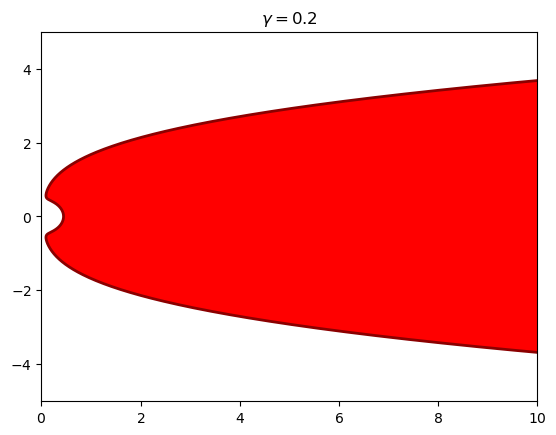

In [22]:
boundary=np.zeros_like(x)        #initialize array
for i in range(len(y)): 
    if y[i]==0: 
        boundary[i]=np.sqrt(gamma)
    else: 
        min=gamma*abs(y[i])**3      #lower entpoint
        max=np.maximum(1, gamma*abs(y[i])**5+gamma*abs(y[i])**3+abs(y[i]**2-gamma))      #upper endpoint
        boundary[i]=scipy.optimize.brentq(p, min, max, args = (y[i]))      #args subsitutes y[i] for y into p(x, y)
ax.plot(boundary, y, color='darkred', linewidth=2)
ax.set_xlim(0, 10)
ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])
fig

## 2.5. Rasterizing Plots

If you tried to save the plot from above as PGF, you'll have noticed that it took quite some time and produced an extremly large image (almost 700 kb). A way around that is *rasterizing* the plot. This means that our plot will not be safed in vectorized form, but in the usual rasterized form. In essence, the PGF file will contain the plot as a PNG file. Note however, that whilst the plot will be rasterized, the text in the figure will not. So we still have the benefits from the 1D case with the slight drawback that the plot itself will be pixeld if zoomed in. Since our plan is that the plot will eventually be imlemented in LaTeX, this is not a big problem as we can simply choose a sufficiently high dpi rate to ensure that the plot has sufficiently high resolution if viewed in normal size. The way to achiev this is thus: 


In [23]:
mpl.use('pgf')

pgf_latex = {                      #setup parameters of Matplotlib to use LaTeX for output
    "pgf.texsystem": "pdflatex",        
    "text.usetex": True,                #LaTeX will write all text
    "font.family": "serif",
    "font.serif": [],                    
    "font.sans-serif": [],              
    "font.monospace": [],
    "axes.labelsize": 10,               
    "font.size": 10,
    "legend.fontsize": 8,               
    "xtick.labelsize": 8,               
    "ytick.labelsize": 8,
    "pgf.preamble": "\n".join([         #plots will use this preamble
        r"\usepackage{amsmath}",
        ])
    }
mpl.rcParams.update(pgf_latex)

In [24]:
fig, ax, =plt.subplots()
ax.pcolormesh(X, Y, F, cmap=rw, rasterized='True')      #rasterizing region plot
ax.plot(boundary, y, color='darkred', linewidth=2, rasterized='True')       #rasterizing plot of boundary
#do NOT rasterize anything to do with labels
ax.set_xlim(0, 10)
ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])
ax.set_title(r'$\gamma=0.2$')
ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])
fig.savefig(r'figures/polynomial_region.pgf', dpi=800)       #specify dpi rate for rasterized plots (default is only by 300)

C:\Users\User\AppData\Local\Temp\ipykernel_11920\304415693.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\304415693.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])


Instad of one PGF file we get now thre files: *polynomial_region.pgf*, *polynomial_region-img0.png* and *polynomial_region-img1.png*. The second file contains the region plot and the third file the plot of the boundary, whereas the pgf file contains the rest of the figure. Note that, combined, their size is only around 165 kb. 

## 2.6. Animated Region plots

The animation of such region plots as above works now very similar to 1D case. Consider the set $S_\gamma$ from above. Imgain we want to plot this region for varying $\gamma$. 

In [27]:
frames=50
gamma = np.linspace(0, 1, frames, endpoint=False)      #set is empty for gamma=0

In [36]:
boundary=np.zeros_like(x)

x=np.linspace(0, 10, 2000)      #make better resolution
y=np.linspace(-5, 5, 2000)

X, Y = np.meshgrid(x, y)

for j in range(frames): 
    F=(X**3-gamma[j]*abs(Y)**3*X**2+(Y**2-gamma[j])*X-gamma[j]*abs(Y)**5>=0)

    for i in range(len(y)): 
        if y[i]==0: 
            boundary[i]=np.sqrt(gamma[j])
        else: 
            min=gamma[j]*abs(y[i])**3      
            max=np.maximum(1, gamma[j]*abs(y[i])**5+gamma[j]*abs(y[i])**3+abs(y[i]**2-gamma[j]))
            boundary[i]=scipy.optimize.brentq(p, min, max, args = (y[i]))

    fig, ax, =plt.subplots()
    ax.pcolormesh(X, Y, F, cmap=rw, rasterized=True)
    ax.plot(boundary, y, color='darkred', linewidth=2, rasterized=True)
    ax.set_xlim(0, 10)
    ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])
    ax.set_title(rf'$\gamma={gamma[j]:.2f}$')
    ax.set_xticklabels(['', '$0$', '$2$', '$4$', '$6$', '$8$', '$10$', ''])
    ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])
    fig.savefig(rf'figures/polynomial_region/im-{j}.pgf', dpi=800)

C:\Users\User\AppData\Local\Temp\ipykernel_11920\3511407734.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['$0$', '$2$', '$4$', '$6$', '$8$', '$10$'])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\3511407734.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '$0$', '$2$', '$4$', '$6$', '$8$', '$10$', ''])
C:\Users\User\AppData\Local\Temp\ipykernel_11920\3511407734.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '$-4$', '$-2$', '$0$', '$2$', '$4$', ''])


To animate these images in LaTeX, we use the same code as in the 1D case: 

If done correctrly, the PDF file looks like this [file. ](polynomial_region.pdf)